# Digital Divide - EDA

In [50]:
import pandas as pd
import altair as alt
import numpy as np
import us
import plotly.express as px
import seaborn as sns

In [51]:
# source: https://nces.ed.gov/programs/digest/2015menu_tables.asp

## Descriptives and documentations

I've collected and cleaned three dataset related to digital divide by state and by income level.

- `nces-household.csv`: Internet access (by state; 2015, 2016, 2017)
- `nces-income.csv`: Internet access of households (by income; 2010, 2015, 2017)
- `nces-reasons.csv`: reasons for not having high-speed access (by income; 2013, 2015, 2017)

In [52]:
nces_household = pd.read_csv("data/nces-household.csv")
nces_household.head()
# nces_household.describe()

,state,total_households_2015,with_computer_incl_cell_2015,total_households_2016,with_computer_incl_cell_2016,total_households_2017,with_computer_incl_cell_2017
0,Alabama,1846400,1490700,1852500,1554400,1841700,1583300
1,Alaska,250200,230000,248500,234600,250700,236700
2,Arizona,2463000,2158600,2519100,2293500,2553000,2356300
3,Arkansas,1144700,935500,1142700,965400,1153100,992700
4,California,12896300,11577000,12944200,11924200,13005100,12160500


In [53]:
nces_income = pd.read_csv("data/nces-income.csv")
nces_income.head()

,income,dial_up_2010,high_speed_int_2010,sate_int_2010,mobile_int_2010,dial_up_2015,high_speed_int_2015,sate_int_2015,mobile_int_2015,dial_up_2017,high_speed_int_2017,sate_int_2017,mobile_int_2017
0,Less than 10k,5.474397,84.768608,1.891732,9.313022,0.817585,64.822173,3.072985,65.292364,1.314908,73.367454,3.726066,83.993252
1,10-19k,6.385029,83.261200,2.275609,8.729896,1.052181,68.358682,3.303643,61.342360,1.762698,77.032408,3.979481,81.849613
2,20-29k,5.295396,84.301690,2.535003,8.505384,0.946549,70.371036,3.158534,59.584984,1.187514,80.001276,4.648892,82.739020
3,30-39k,4.754989,85.231332,2.841575,8.479840,0.655123,71.480627,3.575873,60.978461,0.889943,81.084499,5.595035,82.519610
4,40-49k,4.426353,85.939363,2.833189,8.881208,0.582713,76.497237,3.361000,61.669727,0.836352,84.183538,5.519191,87.687829


In [54]:
nces_reasons = pd.read_csv("data/nces-reasons.csv")
nces_reasons.head()

,income,2010_1,2010_2,2010_3,2010_4,2010_5,2010_6,2010_7,2013_1,2013_2,...,2015_5,2015_6,2015_7,2017_1,2017_2,2017_3,2017_4,2017_5,2017_6,2017_7
0,Less than 10k,55.901513,30.862084,39.890187,4.158728,0.604355,18.682666,5.801980,32.3030,45.1196,...,8.402742,0.738135,6.206651,47.319783,34.227615,2.221476,1.655330,3.752142,0.997027,9.826626
1,10-19k,49.661223,41.329476,31.307251,3.527130,0.455517,17.191437,6.189189,41.9542,34.8852,...,9.403751,1.042608,6.828373,52.970725,28.529874,1.237404,1.759408,3.315675,1.305426,10.881489
2,20-29k,39.724911,40.457514,32.267537,4.064113,1.029953,14.897674,7.283208,43.1331,33.8200,...,8.482689,1.258063,9.181644,54.934676,27.780963,1.220311,1.917567,4.707232,1.344324,8.094928
3,30-39k,28.927634,42.668520,28.798315,5.944933,0.949274,14.280978,7.357981,42.8311,31.6946,...,9.249542,1.032163,7.260361,58.094151,22.417845,2.112894,1.791520,5.475669,0.985614,9.122306
4,40-49k,18.764369,41.510531,26.626469,6.368174,1.350076,15.412085,8.732665,44.5498,29.3782,...,6.680010,1.838689,7.258199,59.172401,21.558393,1.692256,3.867258,3.383165,2.320273,8.006254


In [55]:
reasons_doc = pd.read_csv("data/reasons_doc.csv")
reasons_doc

,reason_id,reason
0,1,Don’t need it (not interested)
1,2,Too expensive
2,3,Can use it somewhere else
3,4,Not available in area
4,5,No computer or computer inadequate
5,6,Privacy or security concerns
6,7,Other reasons


## Some visualizations
### By state

Table 702.60

In [56]:
nces_household["pct_2015"] = nces_household["with_computer_incl_cell_2015"]/nces_household["total_households_2015"]
nces_household["pct_2016"] = nces_household["with_computer_incl_cell_2016"]/nces_household["total_households_2016"]
nces_household["pct_2017"] = nces_household["with_computer_incl_cell_2017"]/nces_household["total_households_2017"]

In [57]:
nces_household_wide = nces_household[["state", "pct_2015", "pct_2016", "pct_2017"]]
nces_household_wide = pd.melt(nces_household_wide, id_vars=["state"], value_vars=["pct_2015", "pct_2016", "pct_2017"])
nces_household_wide.head()

,state,variable,value
0,Alabama,pct_2015,0.807355
1,Alaska,pct_2015,0.919265
2,Arizona,pct_2015,0.876411
3,Arkansas,pct_2015,0.817245
4,California,pct_2015,0.897699


In [58]:
alt.Chart(nces_household_wide).mark_circle().encode(
    x=alt.X("value:Q", scale=alt.Scale(domain=[0.75, 1])),
    y=alt.Y("state:N", sort="-x"),
    color=alt.Color("variable")
)

## can plot this on a map to see the geographical distribution
## or we can make this chart interactive by sorting the y-axis on different years

alt.Chart(...)

### By income

Table 702.35

In [59]:
income_sub_wide1 = nces_income[["income", "dial_up_2010", "high_speed_int_2010", "mobile_int_2010", "sate_int_2010"]]
income_sub_wide1 = pd.melt(income_sub_wide1, id_vars=["income"], value_vars=["dial_up_2010", "high_speed_int_2010", "mobile_int_2010", "sate_int_2010"])
income_sub_wide2 = nces_income[["income", "dial_up_2017", "high_speed_int_2017", "mobile_int_2017", "sate_int_2017"]]
income_sub_wide2 = pd.melt(income_sub_wide2, id_vars=["income"], value_vars=["dial_up_2017", "high_speed_int_2017", "mobile_int_2017", "sate_int_2017"])
# income_sub_wide2

In [60]:
bar1 = alt.Chart(income_sub_wide1).mark_bar().encode(
    x=alt.X("income:N", sort="-y"),
    y=alt.Y("value:Q"),
    color="variable",
    order=alt.Order("variable", sort="ascending")
)

bar2 = alt.Chart(income_sub_wide2).mark_bar().encode(
    x=alt.X("income:N", sort="-y"),
    y=alt.Y("value:Q"),
    color="variable",
    order=alt.Order("variable", sort="ascending")
)

bar1|bar2

## the significant change in the access to mobile internet
## a higher level of inequality

alt.HConcatChart(...)

### Reasons

Table 702.40 & 702.10

In [61]:
# reasons_doc[reasons_doc["reason_id"]==1]["reason"].values[0]

In [62]:
def annotate_reason(text):
    reason_id = int(text[-1])
    reason = reasons_doc[reasons_doc["reason_id"]==reason_id]["reason"].values[0]
    return reason

In [63]:
reasons_wide = pd.melt(nces_reasons, id_vars=["income"])
reasons_wide["reason_text"] = reasons_wide["variable"].map(lambda x: annotate_reason(x))
reasons_wide["year"] = reasons_wide["variable"].map(lambda x: x[0:4])
reasons_wide

,income,variable,value,reason_text,year
0,Less than 10k,2010_1,55.901513,Don’t need it (not interested),2010
1,10-19k,2010_1,49.661223,Don’t need it (not interested),2010
2,20-29k,2010_1,39.724911,Don’t need it (not interested),2010
3,30-39k,2010_1,28.927634,Don’t need it (not interested),2010
4,40-49k,2010_1,18.764369,Don’t need it (not interested),2010
5,50-74k,2010_1,14.451187,Don’t need it (not interested),2010
6,75-99k,2010_1,8.731860,Don’t need it (not interested),2010
7,100k or more,2010_1,4.761172,Don’t need it (not interested),2010
8,Less than 10k,2010_2,30.862084,Too expensive,2010
9,10-19k,2010_2,41.329476,Too expensive,2010


In [64]:
# alt.Chart(reasons_wide).mark_point().encode(
#     x="year:O",
#     y="value",
#     color="reason_text"
# ).transform_filter(
#     alt.datum.income == "10-19k"
# )

In [92]:
alt.Chart(reasons_wide).mark_rect().encode(
    x=alt.X("income:N"),
    y=alt.Y("reason_text:N"),
    color=alt.Color("value:Q")
).transform_filter(
    alt.datum.year == "2017"
)

## can add a slider to see how the distributions of reasons change over time

alt.Chart(...)

In [93]:
household_debt = pd.read_csv("data/household-debt-by-state.csv")
household_debt.head()
## variables in this dataset are year, quarter (accting), state #, and lower and upper estimates of consumer debt to income ratio

,year,qtr,state_fips,low,high
0,1999,1,1,1.09,1.24
1,1999,1,2,1.33,1.41
2,1999,1,4,1.33,1.41
3,1999,1,5,0.39,1.09
4,1999,1,6,1.62,1.75


In [67]:
def map_state_fips(fips_int):
    fips = str(fips_int)
    if fips_int < 10:
        fips = '0' + fips
    return us.states.lookup(fips).abbr

household_debt['state'] = household_debt['state_fips'].map(map_state_fips)


In [68]:
household_debt_subset = household_debt.loc[household_debt['year'].isin([2015, 2016, 2017])]

In [69]:
household_debt_subset = household_debt_subset[['year','state','low','high']].groupby(['year','state']).mean().reset_index()

In [70]:
fig = px.choropleth(household_debt_subset.loc[household_debt_subset['year'] == 2015],  # Input Pandas DataFrame
                    locations="state",  # DataFrame column with locations # DataFrame column with color values
                    color='low',
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = '2015 State Rankings', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()

In [71]:
fig2 = px.choropleth(household_debt_subset.loc[household_debt_subset['year'] == 2015],  # Input Pandas DataFrame
                    locations="state",  # DataFrame column with locations
                    color="high",  # DataFrame column with color values
                    locationmode = 'USA-states') # Set to plot as US States
fig2.update_layout(
    title_text = '2015 Upper Estimates of Consumer Debt-to-Income', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)

fig2.show()


In [72]:
fig3 = px.choropleth(household_debt_subset.loc[household_debt_subset['year'] == 2016],  # Input Pandas DataFrame
                    locations="state",  # DataFrame column with locations
                    color="high",  # DataFrame column with color values
                    locationmode = 'USA-states') # Set to plot as US States
fig3.update_layout(
    title_text = '2016 Upper Estimates of Consumer Debt-to-Income', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)

fig3.show()

In [73]:
fig4 = px.choropleth(household_debt_subset.loc[household_debt_subset['year'] == 2017],  # Input Pandas DataFrame
                    locations="state",  # DataFrame column with locations
                    color="high",  # DataFrame column with color values
                    locationmode = 'USA-states') # Set to plot as US States
fig4.update_layout(
    title_text = '2017 Upper Estimates of Consumer Debt-to-Income', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)

fig4.show()

In [74]:
debt_melt = pd.melt(household_debt_subset, id_vars=['state','year'], value_vars=['low', 'high'],
                   var_name='estimate_type', value_name='average_estimate')
debt_melt.head(10)
## small multiples:
sm_multiples = px.line(debt_melt, x="year", y="average_estimate",
               color='estimate_type',
               facet_col='state',facet_col_wrap=8)



In [75]:
sm_multiples.update_layout(
    title_text = 'State Estimates of Consumer Debt-to-Income', # Create a Title
)

sm_multiples.show()

In [76]:
nces_household_wide['state_abbr'] = nces_household_wide['state'].map(lambda x: us.states.lookup(x).abbr)

In [77]:
### correlation matrix: 

del nces_household_wide['state']


In [78]:
nces_household_wide = nces_household_wide.rename(
    {'variable': 'pct_year', 'value': 'internet_pct'}, axis=1)

In [79]:
nces_household_wide

,pct_year,internet_pct,state_abbr
0,pct_2015,0.807355,AL
1,pct_2015,0.919265,AK
2,pct_2015,0.876411,AZ
3,pct_2015,0.817245,AR
4,pct_2015,0.897699,CA
5,pct_2015,0.912517,CO
6,pct_2015,0.883754,CT
7,pct_2015,0.874929,DE
8,pct_2015,0.893542,DC
9,pct_2015,0.874853,FL


In [80]:
totalData = household_debt_subset.merge(nces_household_wide, left_on='state',
                                       right_on='state_abbr')

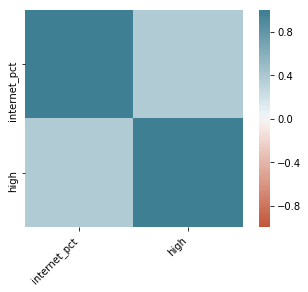

In [81]:

corr = totalData[['internet_pct', 'high']].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [82]:
corrData = totalData[['state','high','internet_pct']].groupby(['state']).corr().reset_index()

In [83]:
corrData = corrData[corrData['level_1']=='high'][['internet_pct', 'state']]

In [84]:
corr_fig = px.choropleth(corrData,  # Input Pandas DataFrame
                    locations="state",  # DataFrame column with locations
                    color="internet_pct",  # DataFrame column with color values
                    locationmode = 'USA-states') # Set to plot as US States
corr_fig.update_layout(
    title_text = 'Correlation Estimates of Consumer Debt-to-Income and Internet Usage', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)

corr_fig.show()

In [90]:
## plot lower estimates:
scatter1 = px.scatter(totalData, x="internet_pct", y="low",facet_col_wrap=8)

scatter1.update_layout(
    title_text = 'Scatterplot of Internet Usage and Debt-to-Income Ratio', # Create a Title
)


scatter1.show()


In [91]:
## plot upper estimates 
scatter2 = px.scatter(totalData, x="internet_pct", y="high",facet_col_wrap=8)

scatter2.update_layout(
    title_text = 'Scatterplot of Internet Usage and Debt-to-Income Ratio', # Create a Title
)


scatter2.show()